<a href="https://colab.research.google.com/github/JoseMartinezSegura/Dataframe_Incidencias_Chiclayo/blob/main/Proyecto_Jose_Martinez_Segura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##DATA SET DE LAS INCIDENCIAS DE CHICLAYO

# **De acuerdo al Dataframe se tiene la siguiente información.**
* **FECHA_CORTE:** Una columna que contiene fechas de corte (almacenados como
objeto).
* **ANIO:** Una columna que almacena el año, (almacenados como entero).
* **MES:** Una columna que almacena el mes, (almacenados como entero).
* **TURNO:** Una columna que almacena el turno, (almacenados como entero).
* **SEMANA:** Una columna que almacena el número de semana, (almacenados como entero).
* **INCIDENCIAS:** Una columna que almacena algún tipo de incidencias.
* **TURNO:** Una columna que almacena el turno, (almacenados como entero).
* **DOMINGO, LUNES, MARTES, MIERCOLES, JUEVES, VIERNES, SABADO:** Columnas que representan los días de la semana,(almacenados como entero).
* **TOTAL:** Una columna que almacena el total de alguna métrica, (almacenados como entero).

# **Introducción**

El data set contiene la información de las incidencias que se generaron en la ciudad de Chiclayo (Perú) en el periodo de febrero a junio del 2023. Así mismo el origen de los datos fue extraído del reposito nacional del Perú ()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar

In [3]:
# Leer cada archivo Excel en un DataFrame separado
df_febrero = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Datasets/2023_Febrero_Incidencias_SegCiudadana.xlsx')
df_marzo = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Datasets/2023_Marzo_Incidencias_SegCiudadana.xlsx')
df_abril = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Datasets/2023_Abril_Incidencias_SegCiudadana.xlsx')
df_mayo = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Datasets/2023_Mayo_Incidencias_SegCiudadana.xlsx')
df_junio = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Datasets/2023_Junio_Incidencias_SegCiudadana.xlsx')

# Unir todos los DataFrames en uno solo
df = pd.concat([df_febrero, df_marzo, df_abril, df_mayo, df_junio], ignore_index=True)

In [4]:
df.head()

,FECHA_CORTE,ANIO,MES,TURNO,SEMANA,INCIDENCIAS,DOMINGO,LUNES,MARTES,MIERCOLES,JUEVES,VIERNES,SABADO,TOTAL
0,2023-02-28,2023,2,NOCHE,1,Comercio ambulatorio,0,0,0,10,10,11,4,35
1,2023-02-28,2023,2,NOCHE,1,Paradero Informal,0,0,0,11,10,11,6,38
2,2023-02-28,2023,2,NOCHE,1,Alteracion Orden Público,0,0,0,3,3,2,1,9
3,2023-02-28,2023,2,NOCHE,1,Zona Rígida,0,0,0,18,17,18,8,61
4,2023-02-28,2023,2,NOCHE,1,Pérdida de Personas,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA_CORTE  700 non-null    datetime64[ns]
 1   ANIO         700 non-null    int64         
 2   MES          700 non-null    int64         
 3   TURNO        700 non-null    object        
 4   SEMANA       700 non-null    int64         
 5   INCIDENCIAS  700 non-null    object        
 6   DOMINGO      700 non-null    int64         
 7   LUNES        700 non-null    int64         
 8   MARTES       700 non-null    int64         
 9   MIERCOLES    700 non-null    int64         
 10  JUEVES       700 non-null    int64         
 11  VIERNES      700 non-null    int64         
 12  SABADO       700 non-null    int64         
 13  TOTAL        700 non-null    int64         
dtypes: datetime64[ns](1), int64(11), object(2)
memory usage: 76.7+ KB


# **Manipulación y limpieza de datos**

In [6]:
## Elimina FECHA_CORTE
df.drop('FECHA_CORTE', axis=1, inplace=True)
df

,ANIO,MES,TURNO,SEMANA,INCIDENCIAS,DOMINGO,LUNES,MARTES,MIERCOLES,JUEVES,VIERNES,SABADO,TOTAL
0,2023,2,NOCHE,1,Comercio ambulatorio,0,0,0,10,10,11,4,35
1,2023,2,NOCHE,1,Paradero Informal,0,0,0,11,10,11,6,38
2,2023,2,NOCHE,1,Alteracion Orden Público,0,0,0,3,3,2,1,9
3,2023,2,NOCHE,1,Zona Rígida,0,0,0,18,17,18,8,61
4,2023,2,NOCHE,1,Pérdida de Personas,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,2023,6,TARDE,5,Meretricio,1,1,3,1,2,1,0,9
696,2023,6,TARDE,5,Consumo Bebidas Alcohólicas - drogas,3,0,1,0,2,0,0,6
697,2023,6,TARDE,5,Indigentes,0,0,0,1,1,1,0,3
698,2023,6,TARDE,5,Movilización,0,0,0,0,0,0,0,0


In [7]:
## Elimina ANIO
df.drop('ANIO', axis=1, inplace=True)
df

,MES,TURNO,SEMANA,INCIDENCIAS,DOMINGO,LUNES,MARTES,MIERCOLES,JUEVES,VIERNES,SABADO,TOTAL
0,2,NOCHE,1,Comercio ambulatorio,0,0,0,10,10,11,4,35
1,2,NOCHE,1,Paradero Informal,0,0,0,11,10,11,6,38
2,2,NOCHE,1,Alteracion Orden Público,0,0,0,3,3,2,1,9
3,2,NOCHE,1,Zona Rígida,0,0,0,18,17,18,8,61
4,2,NOCHE,1,Pérdida de Personas,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
695,6,TARDE,5,Meretricio,1,1,3,1,2,1,0,9
696,6,TARDE,5,Consumo Bebidas Alcohólicas - drogas,3,0,1,0,2,0,0,6
697,6,TARDE,5,Indigentes,0,0,0,1,1,1,0,3
698,6,TARDE,5,Movilización,0,0,0,0,0,0,0,0


In [8]:
# Eliminamos las filas con Totales en CERO
df.drop(df[df['TOTAL'] == 0].index, inplace=True)
df

,MES,TURNO,SEMANA,INCIDENCIAS,DOMINGO,LUNES,MARTES,MIERCOLES,JUEVES,VIERNES,SABADO,TOTAL
0,2,NOCHE,1,Comercio ambulatorio,0,0,0,10,10,11,4,35
1,2,NOCHE,1,Paradero Informal,0,0,0,11,10,11,6,38
2,2,NOCHE,1,Alteracion Orden Público,0,0,0,3,3,2,1,9
3,2,NOCHE,1,Zona Rígida,0,0,0,18,17,18,8,61
5,2,NOCHE,1,Meretricio,0,0,0,4,3,4,3,14
...,...,...,...,...,...,...,...,...,...,...,...,...
693,6,TARDE,5,Zona Rígida,0,0,0,1,0,0,0,1
694,6,TARDE,5,Pérdida de Personas,0,0,0,0,0,1,0,1
695,6,TARDE,5,Meretricio,1,1,3,1,2,1,0,9
696,6,TARDE,5,Consumo Bebidas Alcohólicas - drogas,3,0,1,0,2,0,0,6


In [9]:
# Crearemos un diccionario para la nueva fila (lo utilizaremos para la semana 5 de Abril)
new_row = {
    'MES': 4,
    'TURNO': 'NOCHE',
    'SEMANA': 5,
    'INCIDENCIAS': 'Comercio ambulatorio',
    'DOMINGO': 0,
    'LUNES': 0,
    'MARTES': 0,
    'MIERCOLES': 0,
    'JUEVES': 0,
    'VIERNES': 0,
    'SABADO': 0,
    'TOTAL': 0
}

# Diccionario a un DataFrame
new_row_df = pd.DataFrame([new_row])

# Concatenar el nuevo DataFrame con el original
df = pd.concat([df, new_row_df], ignore_index=True)

In [10]:
# Consultamos lo agregado mediante Filtro del mes 4 semana 5
filtro02 = df['MES'] == 4
filtro03 = df['SEMANA'] == 5
df[filtro02 & filtro03]

,MES,TURNO,SEMANA,INCIDENCIAS,DOMINGO,LUNES,MARTES,MIERCOLES,JUEVES,VIERNES,SABADO,TOTAL
515,4,NOCHE,5,Comercio ambulatorio,0,0,0,0,0,0,0,0


In [11]:
# Filtros de datos de dias de semana
descripcion = df.loc[:,'DOMINGO':'SABADO']
descripcion_filtrada = descripcion[(descripcion != 0).any(axis=1)]
descripcion_filtrada

,DOMINGO,LUNES,MARTES,MIERCOLES,JUEVES,VIERNES,SABADO
0,0,0,0,10,10,11,4
1,0,0,0,11,10,11,6
2,0,0,0,3,3,2,1
3,0,0,0,18,17,18,8
4,0,0,0,4,3,4,3
...,...,...,...,...,...,...,...
510,0,0,0,1,0,0,0
511,0,0,0,0,0,1,0
512,1,1,3,1,2,1,0
513,3,0,1,0,2,0,0


In [12]:
# Validamos los datos del data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MES          516 non-null    int64 
 1   TURNO        516 non-null    object
 2   SEMANA       516 non-null    int64 
 3   INCIDENCIAS  516 non-null    object
 4   DOMINGO      516 non-null    int64 
 5   LUNES        516 non-null    int64 
 6   MARTES       516 non-null    int64 
 7   MIERCOLES    516 non-null    int64 
 8   JUEVES       516 non-null    int64 
 9   VIERNES      516 non-null    int64 
 10  SABADO       516 non-null    int64 
 11  TOTAL        516 non-null    int64 
dtypes: int64(10), object(2)
memory usage: 48.5+ KB


# **Análisis descriptivo**

In [13]:
# Calculos de media, mediana, moda, deviación y estándar
df.describe()

,MES,SEMANA,DOMINGO,LUNES,MARTES,MIERCOLES,JUEVES,VIERNES,SABADO,TOTAL
count,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000
mean,4.137597,2.868217,3.282946,4.036822,4.339147,4.575581,4.523256,4.610465,4.112403,29.480620
std,1.448957,1.358925,5.567013,7.483613,7.436939,7.879191,7.678835,8.246294,7.780419,46.365932
min,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000
75%,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,32.500000
max,6.000000,5.000000,35.000000,52.000000,45.000000,57.000000,52.000000,55.000000,45.000000,283.000000


In [14]:
# Agrupamos datos segun el mes
total_por_mes = df.groupby('MES')['TOTAL'].sum().values
total_por_mes

array([2791, 2457, 2173, 3751, 4040])

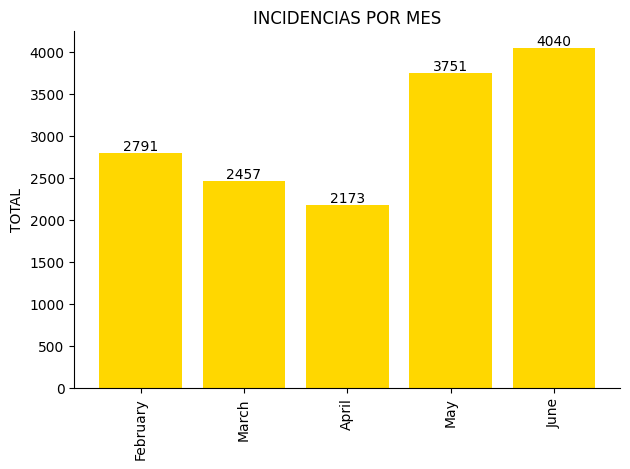

In [15]:
# Calcular el total de incidencias por mes
total_por_mes = df.groupby('MES')['TOTAL'].sum()

# Crear el gráfico de barras
fig, ax = plt.subplots()
x = total_por_mes.index
y = total_por_mes.values
bars = ax.bar(x, y, label='MES', color='#ffd700')

# Configurar etiquetas para los meses
ax.set_xticks(x)
ax.set_xticklabels(calendar.month_name[2:len(x)+2], rotation=90)

# Etiquetas de barras
ax.bar_label(bars)

# Quitar las lineas de los lados
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Ajustar elementos al tamaño de la figura
fig.tight_layout()

ax.set_title('INCIDENCIAS POR MES')
ax.set_ylabel('TOTAL')
fig.tight_layout()
plt.show()

Interpretación de resultados: Como podemos visualizar en el gráfico de incidencia por mes, podemos observar que el mes donde hubo más incidencias fue el mes de junio con 4040 y seguidamente mayo con 3751.

In [16]:
# Total de incidencias por semana
total_por_semana = df.groupby('SEMANA')['TOTAL'].sum()
total_por_semana

SEMANA
1    2439
2    3587
3    3580
4    3455
5    2151
Name: TOTAL, dtype: int64

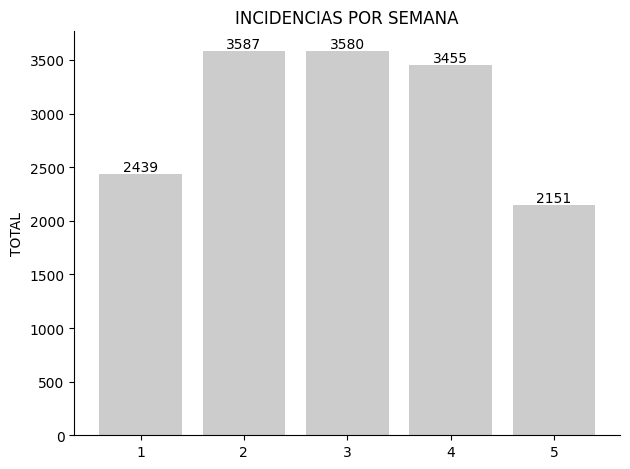

In [17]:
# Calcular el total de incidencias por semana
total_por_semana = df.groupby('SEMANA')['TOTAL'].sum()

# Crear el gráfico de barras
fig, ax = plt.subplots()
x = total_por_semana.index
y = total_por_semana.values
bars = ax.bar(x, y, label='SEMANA', color='#CCCCCC')


# Etiquetas de barras
ax.bar_label(bars)

# Quitar las lineas de los lados
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Ajustar elementos al tamaño de la figura
fig.tight_layout()

ax.set_title('INCIDENCIAS POR SEMANA')
ax.set_ylabel('TOTAL')
fig.tight_layout()
plt.show()

Interpretación de resultados: Como podemos visualizar en el gráfico de incidencia por semana, podemos observar que la semana donde hubo más incidencias fue la semana 02 y semana 3.

In [18]:
# Calculo de Total incidencias por turnos
total_por_turno = df.groupby('TURNO')['TOTAL'].sum()
total_por_turno

TURNO
MAÑANA    4895
NOCHE     5415
TARDE     4902
Name: TOTAL, dtype: int64

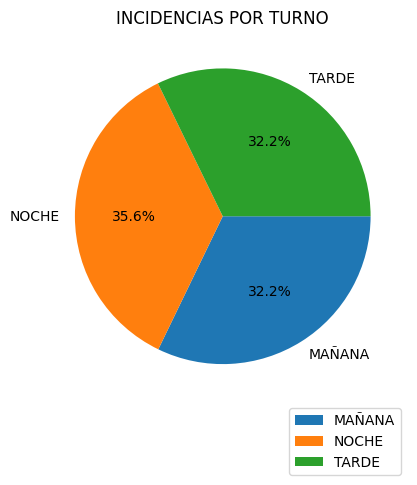

In [19]:
# gráfico circular por turnos
fig, ax = plt.subplots()
ax.pie(total_por_turno, labels=total_por_turno.index, autopct='%1.1f%%',counterclock=False, colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
ax.set_title('INCIDENCIAS POR TURNO')
ax.legend(bbox_to_anchor = (1,0))
plt.show()

Interpretación de resultados: Segun la grafica el turno de la noche es donde se dan mas incidencias con 35.6% seguidamente de tarde y mañana con 32.2%.

In [20]:
# Total indidencias por mes en un array
total_por_incidencias = df.groupby(['MES','INCIDENCIAS'])['TOTAL'].sum().values
total_por_incidencias

array([   8,   53, 1412,  302,   61,  108,    5,  399,    8,  435,    2,
         16, 1239,  301,   47,  190,    1,  382,    5,  274,   10,   11,
       1242,  119,  101,  132,    7,  282,    3,  266,   27,   34, 2078,
        230,  166,  189,    7,  478,    7,  535,   37,   35, 2221,  189,
        126,  240,   10,  510,    9,  663])

In [21]:
# Calculo mes y semana 01
sem01 = df[df['SEMANA'] == 1].groupby(['MES','SEMANA']).sum('TOTAL')['TOTAL']
sem01

MES  SEMANA
2    1         606
3    1         268
4    1         460
5    1         660
6    1         445
Name: TOTAL, dtype: int64

In [22]:
# Calculo mes y semana 02
sem02 = df[df['SEMANA'] == 2].groupby(['MES','SEMANA']).sum('TOTAL')['TOTAL']
sem02

MES  SEMANA
2    2         710
3    2         701
4    2         424
5    2         774
6    2         978
Name: TOTAL, dtype: int64

In [23]:
# Calculo mes y semana 03
sem03 = df[df['SEMANA'] == 3].groupby(['MES','SEMANA']).sum('TOTAL')['TOTAL']
sem03

MES  SEMANA
2    3         697
3    3         580
4    3         616
5    3         788
6    3         899
Name: TOTAL, dtype: int64

In [24]:
# Calculo mes y semana 04
sem04 = df[df['SEMANA'] == 4].groupby(['MES','SEMANA']).sum('TOTAL')['TOTAL']
sem04

MES  SEMANA
2    4          497
3    4          461
4    4          673
5    4          803
6    4         1021
Name: TOTAL, dtype: int64

In [25]:
# Calculo mes y semana 05
sem05 = df[df['SEMANA'] == 5].groupby(['MES','SEMANA']).sum('TOTAL')['TOTAL']
sem05

MES  SEMANA
2    5         281
3    5         447
4    5           0
5    5         726
6    5         697
Name: TOTAL, dtype: int64

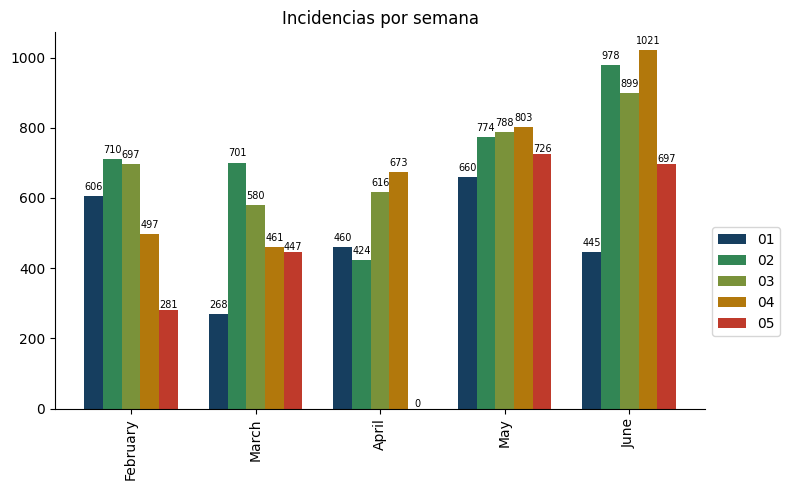

In [26]:
## Grafica de barras
fig, ax = plt.subplots(figsize = (8,5), dpi = 100) #800x500px

#ancho
bar_width = 0.3

#posicione
x = np.arange(1,10,2) #10

#semana01
sem01 = ax.bar(x - (bar_width*2),sem01,
                       bar_width, label = '01', color = '#163e5f')

#semana02
sem02 = ax.bar(x - bar_width, sem02,
                       bar_width, label = '02', color = '#328655')

#semana03
sem03 = ax.bar(x, sem03,
                       bar_width, label ='03', color = '#7a923a')

#semana04
sem04 = ax.bar(x + bar_width, sem04,
                       bar_width, label ='04', color = '#b2780c')

#semana05
sem05 = ax.bar(x + (bar_width*2), sem05,
                       bar_width, label ='05', color = '#bf3a2b')


# Nombres de paises en el eje x
ax.set_xticks(x)
ax.set_xticklabels(calendar.month_name[2:len(x)+2], rotation=90)

# Etiquetas de barras
ax.bar_label(sem01, padding=3, fontsize=7)
ax.bar_label(sem02, padding=3, fontsize=7)
ax.bar_label(sem03, padding=3, fontsize=7)
ax.bar_label(sem04, padding=3, fontsize=7)
ax.bar_label(sem05, fontsize=7)


# Quitar las lineas de los lados
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Leyendas
ax.legend(bbox_to_anchor = (1,0.5))
ax.set_title('Incidencias por semana')

# Ajustar elementos al tamaño de la figura
fig.tight_layout()

# Mostrar datos
plt.show()

Interpretación de resultados: Podemos visualizar que las incidencias de mayor proporcion se dieron en junio, entre las semanas 03 y 04, las menores incidencias se dan en las semana 01 y 02 (dependiendo el mes)

In [27]:
DOMINGO = df[df['DOMINGO'] == True].groupby('MES')['TOTAL'].sum()
LUNES = df[df['LUNES'] == True].groupby('MES')['TOTAL'].sum()
MARTES = df[df['MARTES'] == True].groupby('MES')['TOTAL'].sum()
MIERCOLES = df[df['MIERCOLES'] == True].groupby('MES')['TOTAL'].sum()
JUEVES = df[df['JUEVES'] == True].groupby('MES')['TOTAL'].sum()
VIERNES = df[df['VIERNES'] == True].groupby('MES')['TOTAL'].sum()
SABADO = df[df['SABADO'] == True].groupby('MES')['TOTAL'].sum()


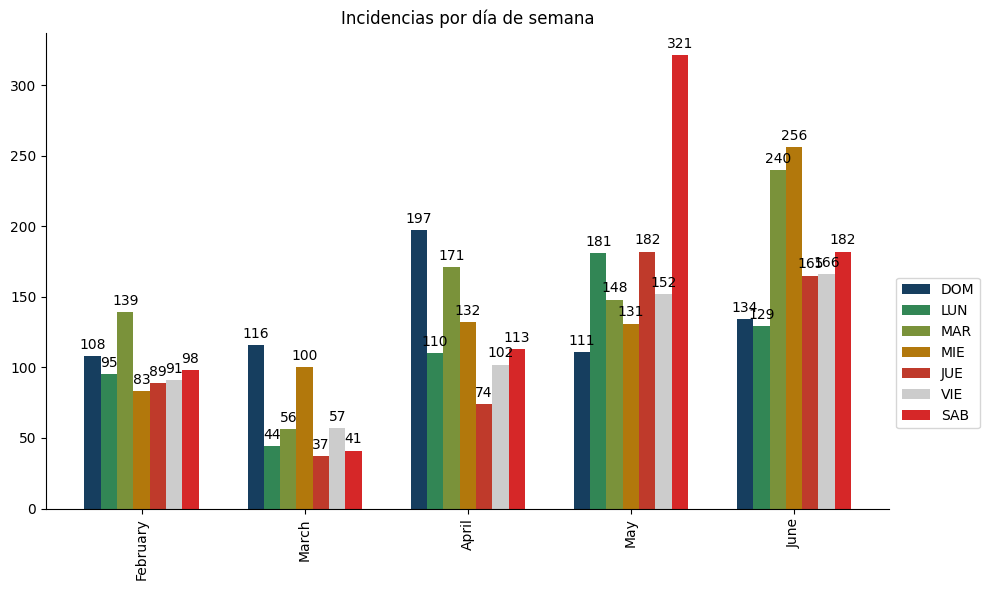

In [28]:
# Crear la gráfica de barras
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)  # 1000x600px

# Ancho de las barras
bar_width = 0.1

# Posiciones
x = np.arange(len(DOMINGO))

# DOMINGO
sem01 = ax.bar(x - 3*bar_width, DOMINGO, bar_width, label='DOM', color='#163e5f')

# LUNES
sem02 = ax.bar(x - 2*bar_width, LUNES, bar_width, label='LUN', color='#328655')

# MARTES
sem03 = ax.bar(x - bar_width, MARTES, bar_width, label='MAR', color='#7a923a')

# MIÉRCOLES
sem04 = ax.bar(x, MIERCOLES, bar_width, label='MIE', color='#b2780c')

# JUEVES
sem05 = ax.bar(x + bar_width, JUEVES, bar_width, label='JUE', color='#bf3a2b')

# VIERNES
sem06 = ax.bar(x + 2*bar_width, VIERNES, bar_width, label='VIE', color='#CCCCCC')

# SÁBADO
sem07 = ax.bar(x + 3*bar_width, SABADO, bar_width, label='SAB', color='#d62728')

# Nombres de los meses en el eje x (ajustar según los datos)
ax.set_xticks(x)
ax.set_xticklabels(calendar.month_name[2:len(x)+2], rotation=90)

# Etiquetas de barras (opcional)
ax.bar_label(sem01, padding=3)
ax.bar_label(sem02, padding=3)
ax.bar_label(sem03, padding=3)
ax.bar_label(sem04, padding=3)
ax.bar_label(sem05, padding=3)
ax.bar_label(sem06, padding=3)
ax.bar_label(sem07, padding=3)

# Quitar las líneas de los lados
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Leyendas
ax.legend(bbox_to_anchor=(1, 0.5))
ax.set_title('Incidencias por día de semana')

# Ajustar elementos al tamaño de la figura
fig.tight_layout()


# Mostrar datos
plt.show()


Interpretación de resultados: Segun los dias de la semana las incidencias en la ciudad de chiclayo se dan los sabados de los meses de mayo y junio.

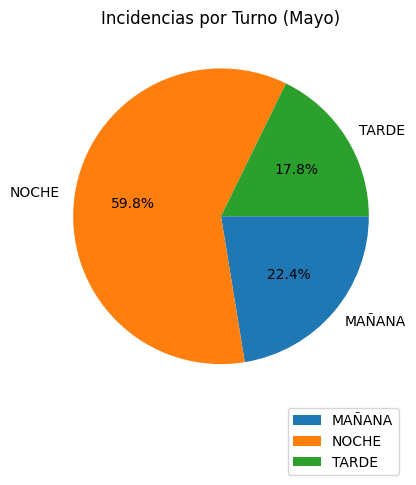

In [29]:
# Filtrar el DataFrame para el mes de mayo y sabados
mayo_sabado = df[(df['MES'] == 5) & (df['SABADO'] == True)]

#Agrupar por 'TURNO' e 'INCIDENCIAS' y sumar la columna 'TOTAL'
mayo_inc = mayo_sabado.groupby(['TURNO'])['TOTAL'].sum()


# gráfico circular por turnos
fig, ax = plt.subplots()
ax.pie(mayo_inc, labels=mayo_inc.index, autopct='%1.1f%%',counterclock=False, colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
ax.set_title('Incidencias por Turno (Mayo)')
ax.legend(bbox_to_anchor = (1,0))
plt.show()


Interpretación de resultados: Según el mes de mayo donde se realizaron mayor incidencias, podemos visualizar que fueron el turno de la noche con 59.8%, seguido por mañana 22.4% y tarde 17.8%.

<ipython-input-30-9ab5c523685b>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=45, ha='right')


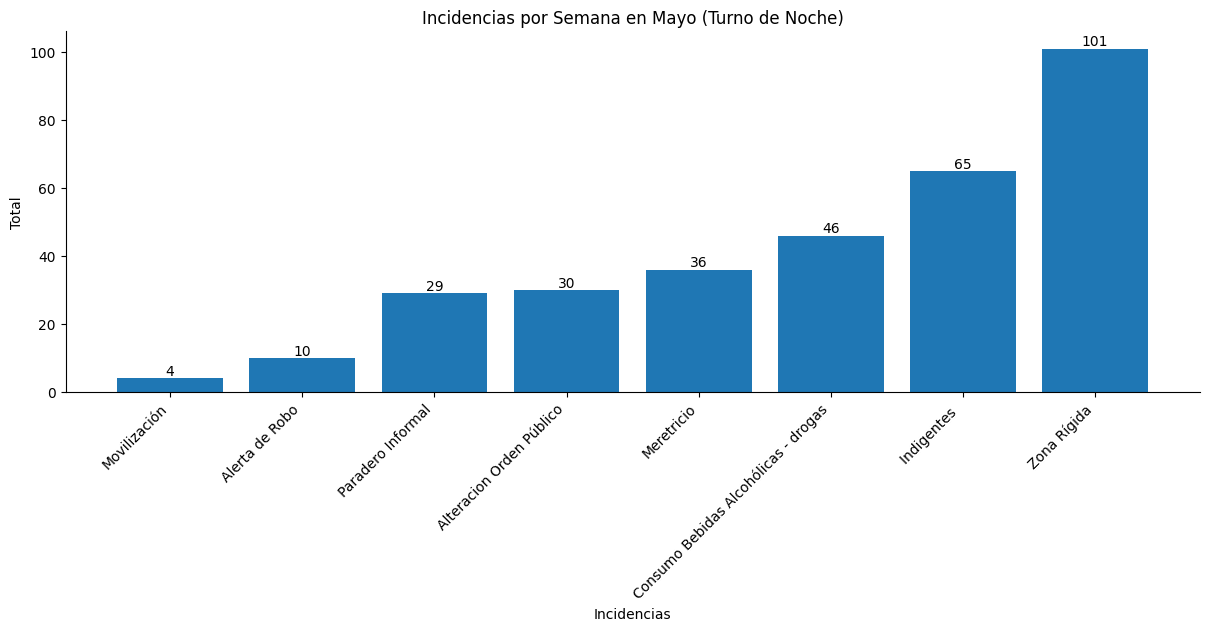

In [30]:
# Filtrar el DataFrame para el mes de mayo y sabados
incicencias_sabado = df[(df['MES'] == 5) & (df['SABADO'] == True) & (df['TURNO'] == 'NOCHE')]

#Agrupar por 'TURNO' e 'INCIDENCIAS' y sumar la columna 'TOTAL'
mayo_sab_inc = mayo_sabado.groupby(['INCIDENCIAS'])['TOTAL'].sum()


# Ordenar los resultados de menor a mayor
mayo_sab_inc = mayo_sab_inc.sort_values()

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))  # Aumentar el tamaño de la figura
x = mayo_sab_inc.index
y = mayo_sab_inc.values
bars = ax.bar(x, y, label='Incidencias', color='#1f77b4')

# Etiquetas de barras
ax.bar_label(bars)

# Quitar las líneas de los lados
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Rotar etiquetas del eje x
ax.set_xticklabels(x, rotation=45, ha='right')

# Ajustar elementos al tamaño de la figura
fig.tight_layout()

ax.set_title('Incidencias por Semana en Mayo (Turno de Noche)')
ax.set_ylabel('Total')
ax.set_xlabel('Incidencias')

# Mostrar el gráfico
plt.show()

Interpretación de resultados: Según el mes de mayo y el turno de la noche, se analiza que la mayor incidencia fue de zona rígida con 101, indigentes 65 seguidamente por el resto de incidencias.

# **Conclusiones**

Las incidencias ocurridas en la ciudad de Chiclayo se realizaron con mayor frecuencia los meses de mayo y junio, además el turno donde se realizó mayor incidencia fue en la noche, por zona rígida debido a que los autos se estacionan en lugares prohibidos por la autoridad municipal.

Las incidencias de Junio, sucedidas indigentes, se debe a que muchos de estas personas deambular por las calles, y los vecinos al verse asustados llaman a las autoridades para erradicarlos.
